<a href="https://colab.research.google.com/github/kartik2627/Rnnadvance/blob/main/googleStockRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
import pandas as pd
# Load the CSV data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')
# Now df holds the dataset in a DataFrame format


In [5]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [10]:
training_data = df.iloc[:,1:2].values


In [7]:
df.describe

<bound method NDFrame.describe of             Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]>

In [9]:
df.info


<bound method DataFrame.info of             Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]>

In [11]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_data)

time_step


In [14]:
#creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range (60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)



In [19]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [20]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [24]:
regressor = Sequential()

In [29]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [30]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [31]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [32]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [33]:
regressor.add(Dense(units = 1))

In [34]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [35]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 23s 349ms/step - loss: 0.0347
Epoch 2/100
38/38 [==============================] - 13s 356ms/step - loss: 0.0056
Epoch 3/100
38/38 [==============================] - 12s 318ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 11s 305ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 12s 319ms/step - loss: 0.0043
Epoch 6/100
38/38 [==============================] - 13s 352ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 14s 364ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 12s 327ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 13s 360ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 10s 279ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 13s 355ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 12s 323ms/step - loss: 0.0040
E

In [37]:
dataset_test = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [39]:
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(df) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


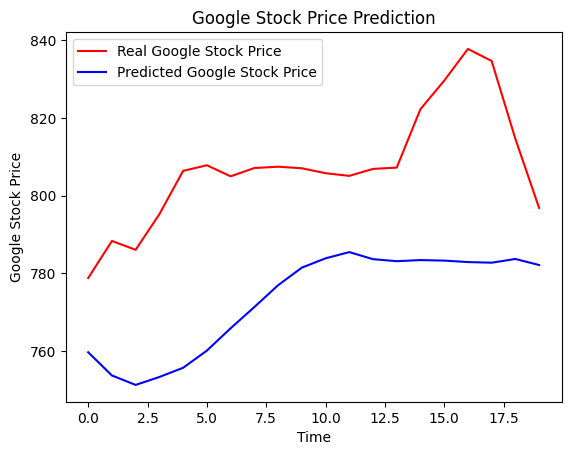

In [40]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [41]:

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))